In [1]:
#https://github.com/Bhasfe/statistics/blob/master/bootstrapping/Confidence%20Interval%20with%20bootstrapping.ipynb
#https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [6]:

# Import the iris dataset
data = pd.read_csv('weight-height.csv')

print( data.shape )

# Looking at information
print("\nInfo:")
display(data.info())

# Summary Statistics
print("\nSummary Statistics:")
display(data.describe())

# Display first 5 rows
display(data.head())



(10000, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


None


Summary Statistics:


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
df = pd.DataFrame([['a', 10], ['b', 20], ['c', 30], ['d', 40]], columns=['letter','number'])
df = df[df.number > 10]
print(df)
print(df.sample(2))
#추가로 drop=True 옵션을 지정해주면 인덱스로 지정은 하되, 기존열을 남겨놓는다.
print(df.sample(2).reset_index(drop=True))
print(df.sample(2).reset_index(drop=False))

  letter  number
1      b      20
2      c      30
3      d      40
  letter  number
1      b      20
3      d      40
  letter  number
0      b      20
1      d      40
   index letter  number
0      2      c      30
1      3      d      40


In [10]:
# Convert inches to centimeters
data["Height(cm)"] = data["Height"]*2.54

# Get summary statistics of Heights in centimeters
display(data['Height(cm)'].describe())

count    10000.000000
mean       168.573602
std          9.772721
min        137.828359
25%        161.304276
50%        168.447898
75%        175.702625
max        200.656806
Name: Height(cm), dtype: float64

In [20]:

# Extract 500 random heights
heights = data['Height(cm)'].sample(500).reset_index(drop=True)

# Display Summary Statistics of heights in cm
display(heights.describe())

count    500.000000
mean     168.004652
std        9.885208
min      140.554691
25%      160.541936
50%      167.351343
75%      175.295606
max      191.023173
Name: Height(cm), dtype: float64

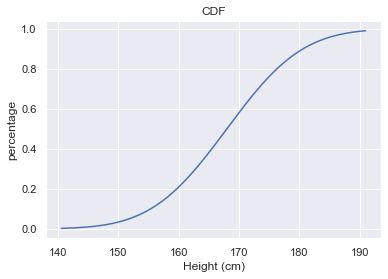

In [21]:
# Get Standard Deviation and Mean

heights_std = np.std(heights)
heights_mean = np.mean(heights)

# Plot Normal CDF
def plot_normal_CDF(data,mean,std,label,title):
    sns.set()
    # CDF of the data
    x = np.linspace(min(data),max(data),len(data))
    cdf = stats.norm.cdf(x,mean,std)
    
    plt.plot(x,cdf)
    plt.xlabel(label)
    plt.ylabel('percentage')
    plt.title(title)
    plt.show()
    return x,cdf

# CDF of Versicolor
x_cdf, y_cdf = plot_normal_CDF(heights, heights_mean, heights_std, "Height (cm)","CDF")

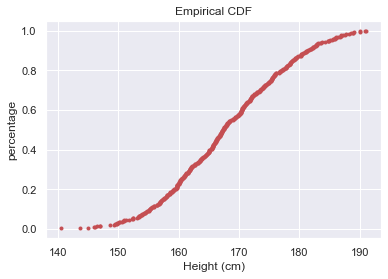

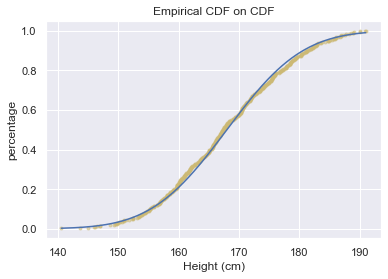

In [23]:
# Create a function to get x, y for of ecdf
def get_ecdf(data):
    
    # Get lenght of the data into n
    n = len(data)
    
    # We need to sort the data
    x = np.sort(data)
    
    # the function will show us cumulative percentages of corresponding data points
    y = np.arange(1,n+1)/n
    
    return x,y

# Create a function to plot ecdf
def plot_ecdf(data,labelx,labely,title,color):
    """Plot ecdf"""
    # Call get_ecdf function and assign the returning values
    x, y = get_ecdf(data)
    
    plt.plot(x,y,marker='.',linestyle='none',c=color)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)

# Create a function overlay ECDF on CDF
def plot_overlay_ecdf(data,labelx,labely,title,color,x_cdf, y_cdf):
    x, y = get_ecdf(data)
    
    plt.plot(x,y,marker='.',linestyle='none',c=color,alpha=0.5)
    plt.plot(x_cdf, y_cdf)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    
# Plotting Empirical CDF
plot_ecdf(heights,"Height (cm)","percentage","Empirical CDF","r")
plt.show()

# Overlap Empirical CDF on CDF
plot_overlay_ecdf(heights,"Height (cm)","percentage","Empirical CDF on CDF","y",x_cdf, y_cdf)
plt.show()

## Plotting PDF
#sns.distplot(heights,hist=False)
#plt.xlabel("Petal length(cm)")
#plt.ylabel("PDF")
#plt.title("Probability Density Function")
#plt.show()

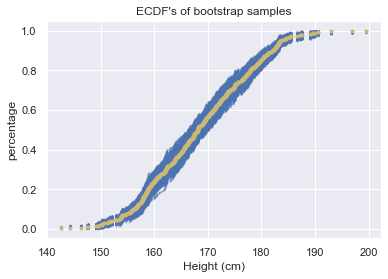

In [8]:

# Plot our original sample ecdf
plot_ecdf(heights,"Height (cm)","percentage","ECDF's of bootstrap samples","y")

for i in range(1000):
    
    #https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    # replace=True
    # Generate a bootstrap sample
    bs_sample_heights = np.random.choice(heights,size=len(heights))
    
    # Plot ecdf for bootstrap sample
    x, y = get_ecdf(bs_sample_heights)
    plt.scatter(x, y,s=1,c='b',alpha=0.3)
    
plt.show()

In [24]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

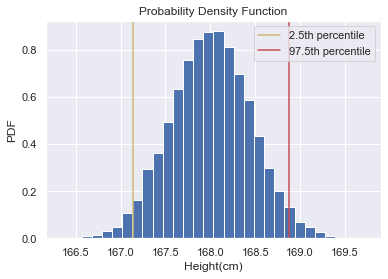

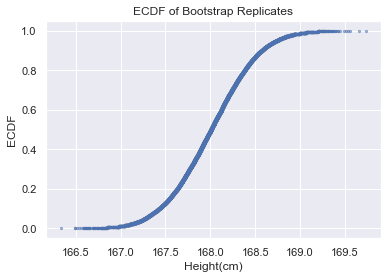

In [25]:

# Draw 10000 bootstrap replicates
bs_replicates_heights = draw_bs_replicates(heights,np.mean,15000)

# Plot probability density function
plt.hist(bs_replicates_heights,bins=30,density=True)
plt.axvline(x=np.percentile(bs_replicates_heights,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bs_replicates_heights,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.xlabel("Height(cm)")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

# Plot the ECDF of replicates
xsbs_ecdf, ysbs_ecdf = get_ecdf(bs_replicates_heights)
plt.scatter(xsbs_ecdf, ysbs_ecdf,s=5,c='b',alpha=0.5)
plt.xlabel("Height(cm)")
plt.ylabel("ECDF")
plt.title("ECDF of Bootstrap Replicates")
plt.show()

In [26]:
print("Empirical mean: " + str(heights_mean))

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights)))

Empirical mean: 168.0046516687201
Bootstrap replicates mean: 168.0063771232967


In [27]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(bs_replicates_heights,[2.5,97.5])

# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [167.14113751 168.88034025]
